First, import all necessary modules: 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import hydron as hd

Next, define number of gridpoints, time stepsize and duration of the simulation:

In [2]:
N = 100       # number of gridpoints, units
dt = 1e-1     # stepsize, s
tau = 1e3     # total duration, s

Now define the loop geometry. For this example we consider cemi-circular loop with radius $R = 10~Mm$. The loop cross-section is set constant by default. The direction of gravity is directed opposite to z-axis (also by default).

In [3]:
R = 10e8       # loop radius, cm
L = np.pi*R   # loop length, cm

idx = np.arange(0,N,dtype=np.float32)/(N-1)

X = np.zeros((N,3), dtype = np.double)    # (N by 3) array of gridpoint coordinates, cm
X[:,0] = np.cos(np.pi*idx)*R              # x-coordinates, cm
X[:,1] = np.sin(np.pi*idx)*R              # y-coordinates, cm

Then we set the initial values of density $n$, velocity $u$ and temperature $T$:

In [4]:
n = np.ones(N, dtype = np.double)*1e9     # density, cm^{-3}
u = np.zeros(N, dtype = np.double)        # velocity, cm/s
T = np.ones(N, dtype = np.double)*2e4     # temperature, K

Further we define the heating rate as a function of time $t$ and coordinate along the loop $s$:

In [5]:
def hrate(s,t):
    return 1e-3 + 1e-1*np.exp(-(s/L-0.5)**2/2/0.01**2)*np.exp(-(t-300)**2/2/25**2)

In [6]:
sim = hd.Solver(dt,tau,hrate = hrate, each = 10/dt)
sim.set_geom(X)
sim.set_initial_values(n,u,T)
sim.start()
sim.wait()

In [7]:
print sim.status, sim.time

done 1000.0


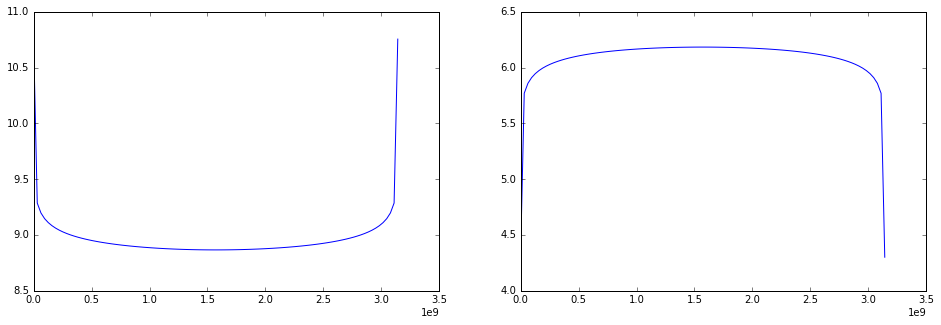

In [8]:
plt.figure(figsize = (16,5))
plt.subplot(121)
plt.plot(sim.s*sim.scx, np.log10(sim.rho*sim.scrho/sim.mu))
plt.subplot(122)
plt.plot(sim.s*sim.scx, np.log10(sim.T*sim.scT))

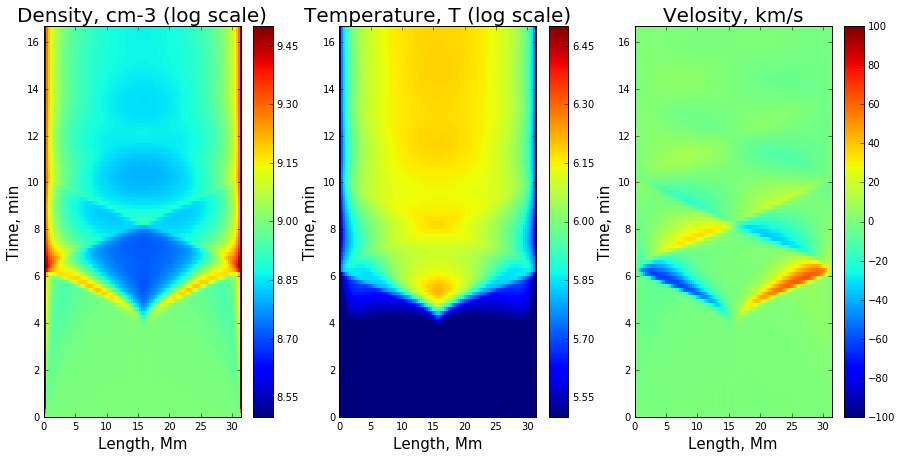

In [12]:
fig = plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title('Density, cm-3 (log scale)', size = 20)
plt.xlabel('Length, Mm', size = 15)
plt.ylabel('Time, min', size = 15)
plt.imshow(np.log10(sim.n_out)+np.log10(sim.scn), vmin = 8.5, vmax=9.5, 
           origin = 'lower', aspect = 'auto', interpolation = 'nearest',
           extent = [0,sim.L*sim.scx/1e8,0,(sim.tau-sim.skip*sim.dt)/60])
plt.colorbar()

plt.subplot(1,3,2)
plt.title('Temperature, T (log scale)', size = 20)
plt.xlabel('Length, Mm', size = 15)
plt.ylabel('Time, min', size = 15)
plt.imshow(np.log10(sim.T_out)+np.log10(sim.scT), vmin = 5.5, vmax=6.5, 
           origin = 'lower', aspect = 'auto', interpolation = 'nearest',
           extent = [0,sim.L*sim.scx/1e8,0,(sim.tau-sim.skip*sim.dt)/60])
plt.colorbar()

plt.subplot(1,3,3)
plt.title('Velosity, km/s', size = 20)
plt.xlabel('Length, Mm', size = 15)
plt.ylabel('Time, min', size = 15)
plt.imshow(np.array(sim.u_out)*sim.scx/1e5, vmin = -100, vmax = 100,
           origin = 'lower', aspect = 'auto', interpolation = 'nearest',
           extent = [0,sim.L*sim.scx/1e8,0,(sim.tau-sim.skip*sim.dt)/60])
plt.colorbar()
